## 서울시 따릉이 이용량 데이터 합산 (23.04~24.03)

# 데이터 전처리 목적 
- 강서구에서 출발, 도착한 데이터들 추출
- 주중, 주말+휴일 데이터 분류 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 전체 파일 불러오는 코드

In [2]:
import os
import pandas as pd

데이터_목록 = []

for 연도 in range(202304, 202313):
    폴더_경로 = f'../../../../data_semi/tpss_bcycl_od_statnhm_{연도}/'

    # 폴더 내의 모든 파일 목록 가져오기
    파일_목록 = os.listdir(폴더_경로)

    # CSV 파일만 필터링
    csv_파일 = [파일 for 파일 in 파일_목록 if 파일.endswith('.csv')]

    # 각 CSV 파일을 읽어오기
    for 파일 in csv_파일:
        파일_경로 = os.path.join(폴더_경로, 파일)
        try:
            데이터 = pd.read_csv(파일_경로, encoding='cp949')
            if '기준_시간' in 데이터.columns and '기준_시간대' not in 데이터.columns:
                데이터.rename(columns={'기준_시간': '기준_시간대'}, inplace=True)
            if '시작_대여소' in 데이터.columns and '시작_대여소_ID' not in 데이터.columns:
                데이터.rename(columns={'시작_대여소': '시작_대여소_ID'}, inplace=True)
            if '종료_대여소' in 데이터.columns and '종료_대여소_ID' not in 데이터.columns:
                데이터.rename(columns={'종료_대여소': '종료_대여소_ID'}, inplace=True)
            if '전체건수' in 데이터.columns and '전체_건수' not in 데이터.columns:
                데이터.rename(columns={'전체건수': '전체_건수'}, inplace=True)

            데이터_목록.append(데이터)
        except Exception as e:
            print(f"{파일_경로}에서 오류 발생: {e}")

for 연도 in range(202401, 202404):
    폴더_경로 = f'../../../../data_semi/tpss_bcycl_od_statnhm_{연도}/'

    # 폴더 내의 모든 파일 목록 가져오기
    파일_목록 = os.listdir(폴더_경로)

    # CSV 파일만 필터링
    csv_파일 = [파일 for 파일 in 파일_목록 if 파일.endswith('.csv')]

    # 각 CSV 파일을 읽어오기
    for 파일 in csv_파일:
        파일_경로 = os.path.join(폴더_경로, 파일)
        try:
            데이터 = pd.read_csv(파일_경로, encoding='cp949')
            if '기준_시간' in 데이터.columns and '기준_시간대' not in 데이터.columns:
                데이터.rename(columns={'기준_시간': '기준_시간대'}, inplace=True)
            if '시작_대여소' in 데이터.columns and '시작_대여소_ID' not in 데이터.columns:
                데이터.rename(columns={'시작_대여소': '시작_대여소_ID'}, inplace=True)
            if '종료_대여소' in 데이터.columns and '종료_대여소_ID' not in 데이터.columns:
                데이터.rename(columns={'종료_대여소': '종료_대여소_ID'}, inplace=True)
            if '전체건수' in 데이터.columns and '전체_건수' not in 데이터.columns:
                데이터.rename(columns={'전체건수': '전체_건수'}, inplace=True)

            데이터_목록.append(데이터)
        except Exception as e:
            print(f"{파일_경로}에서 오류 발생: {e}")

# 데이터프레임들을 하나로 병합
데이터_01 = pd.concat(데이터_목록, ignore_index=True)

../../../../data_semi/tpss_bcycl_od_statnhm_202401/tpss_bcycl_od_statnhm_20240101.csv에서 오류 발생: 'cp949' codec can't decode byte 0xa4 in position 5: illegal multibyte sequence
../../../../data_semi/tpss_bcycl_od_statnhm_202401/tpss_bcycl_od_statnhm_20240102.csv에서 오류 발생: 'cp949' codec can't decode byte 0xa4 in position 5: illegal multibyte sequence


In [5]:
데이터_01.head(20)

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리
0,20230411,출발시간,0,ST-1282,중계1동_059_1,ST-1282,중계1동_059_1,1,0,0
1,20230411,출발시간,0,ST-1793,가락1동_001_2,ST-1793,가락1동_001_2,1,0,0
2,20230411,출발시간,0,ST-206,용강동_021_1,ST-206,용강동_021_1,1,0,0
3,20230411,출발시간,0,ST-2073,월계2동_001_2,ST-2073,월계2동_001_2,1,0,0
4,20230411,출발시간,0,ST-2137,번1동_030_2,ST-2137,번1동_030_2,1,0,0
5,20230411,출발시간,0,ST-257,자양1동_042_1,ST-257,자양1동_042_1,1,0,0
6,20230411,출발시간,0,ST-2897,남가좌2동_037_1,ST-2897,남가좌2동_037_1,1,1,70
7,20230411,출발시간,0,ST-613,창1동_026_1,ST-613,창1동_026_1,1,0,0
8,20230411,출발시간,5,ST-1317,안암동_004_1,ST-1317,안암동_004_1,1,0,0
9,20230411,출발시간,5,ST-150,종로1·2·3·4가동_010_1,ST-150,종로1·2·3·4가동_010_1,1,0,0


# 서울시 전체 이용량 데이터 전처리
- 집계 기준 : 출발, 도착 두개이므로 겹치는 자료 제거
- 전체_이용_분, 전체_이용_거리 : 이용 시간과 거리가 0이면 사용하지 않았으므로 제거

In [8]:
# 전체 파일에서 1차 전처리 (집계_기준 2개 -> 1개로 줄임, 사용량 =0)
데이터_01 = 데이터_01[데이터_01['집계_기준'] != '도착시간']
데이터_01 = 데이터_01[(데이터_01['전체_이용_분'] != 0) & (데이터_01['전체_이용_거리'] != 0)]

## 구 단위 따릉이 이용량 분석

- 주소 1의 구 단위 확인
 구 data : 각 구별 대여소 ID 저장 

In [13]:
import numpy as np
import pandas as pd


data= pd.read_csv('../../Data/따릉이/서울시 따릉이대여소 마스터 정보.csv',encoding='cp949')

대여소_data = data[['대여소_ID', '주소1']]

대여소_data['구'] = data['주소1'].str.extract(r'(\S+)구')

# 대여소를 구별로 묶기
구_data = 대여소_data.groupby('구')['대여소_ID'].apply(list).reset_index()


/var/folders/_j/yl1g13yd0_s25zcx_fwnjdkm0000gn/T/ipykernel_6168/319479492.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  대여소_data['구'] = data['주소1'].str.extract(r'(\S+)구')


In [15]:
# 데이터 복사본 생성
데이터_01_복사 = 데이터_01.copy()

# 시작 대여소의 구 정보 추가
for index, row in 구_data.iterrows():
    구 = row['구']
    대여소_ID_list = row['대여소_ID']
    데이터_01_복사.loc[데이터_01_복사['시작_대여소_ID'].isin(대여소_ID_list), '시작_대여소_구'] = 구

# 종료 대여소의 구 정보 추가
for index, row in 구_data.iterrows():
    구 = row['구']
    대여소_ID_list = row['대여소_ID']
    데이터_01_복사.loc[데이터_01_복사['종료_대여소_ID'].isin(대여소_ID_list), '종료_대여소_구'] = 구

print(데이터_01_복사)

             기준_날짜 집계_기준  기준_시간대 시작_대여소_ID      시작_대여소명 종료_대여소_ID  \
6         20230411  출발시간       0   ST-2897  남가좌2동_037_1   ST-2897   
12        20230411  출발시간      10   ST-1061   천호1동_039_1   ST-1061   
84        20230411  출발시간     100   ST-3203   길음2동_004_2   ST-3203   
86        20230411  출발시간     105   ST-1586   잠실6동_031_1   ST-1586   
104       20230411  출발시간     120    ST-713    서림동_003_2    ST-713   
...            ...   ...     ...       ...          ...       ...   
84599247  20240312  출발시간    2355   ST-1994    목5동_034_1   ST-2039   
84599248  20240312  출발시간    2355    ST-249    사근동_017_1   ST-2340   
84599249  20240312  출발시간    2355   ST-2599    장지동_012_3   ST-2599   
84599252  20240312  출발시간    2355   ST-3142  영등포본동_015_4    ST-306   
84599254  20240312  출발시간    2355     ST-66   여의동_005_14     ST-70   

              종료_대여소명  전체_건수  전체_이용_분  전체_이용_거리 시작_대여소_구 종료_대여소_구  
6         남가좌2동_037_1      1        1        70      서대문      서대문  
12         천호1동_039_1      1       

- 각 구에서 출발, 도착한 데이터 별로 묶음

In [16]:
시작_대여소_구별_전체_건수 = 데이터_01_복사.groupby('시작_대여소_구')['전체_건수'].sum().reset_index()

종료_대여소_구별_전체_건수 = 데이터_01_복사.groupby('종료_대여소_구')['전체_건수'].sum().reset_index()

In [17]:
같은_구_이동 = 데이터_01_복사[데이터_01_복사['시작_대여소_구'] == 데이터_01_복사['종료_대여소_구']]

# 출발 구별로 개수 계산
출발_구별_이동_수 = 같은_구_이동.groupby('시작_대여소_구').size().reset_index(name='이동_수')

print("같은 구에서 출발해서 같은 구에 도착하는 이동 수:\n")
print(출발_구별_이동_수.to_string(index=False))

같은 구에서 출발해서 같은 구에 도착하는 이동 수:

시작_대여소_구    이동_수
      강남  900915
      강동 1427310
      강북  318135
      강서 4426566
      관악  704790
      광진 1462013
      구로 1084539
      금천  514315
      노원 1982799
      도봉  498906
     동대문  857807
      동작  431746
      마포 1375408
     서대문  385825
      서초  747689
      성동  867997
      성북  564601
      송파 3051428
      양천 1921228
     영등포 2587556
      용산  555215
      은평  741784
      종로  846984
       중  451613
      중랑  771231


In [19]:
print(출발_구별_이동_수.sort_values(by='이동_수', ascending=False))

   시작_대여소_구     이동_수
3        강서  4426566
17       송파  3051428
19      영등포  2587556
8        노원  1982799
18       양천  1921228
5        광진  1462013
1        강동  1427310
12       마포  1375408
6        구로  1084539
0        강남   900915
15       성동   867997
10      동대문   857807
22       종로   846984
24       중랑   771231
14       서초   747689
21       은평   741784
4        관악   704790
16       성북   564601
20       용산   555215
7        금천   514315
9        도봉   498906
23        중   451613
11       동작   431746
13      서대문   385825
2        강북   318135


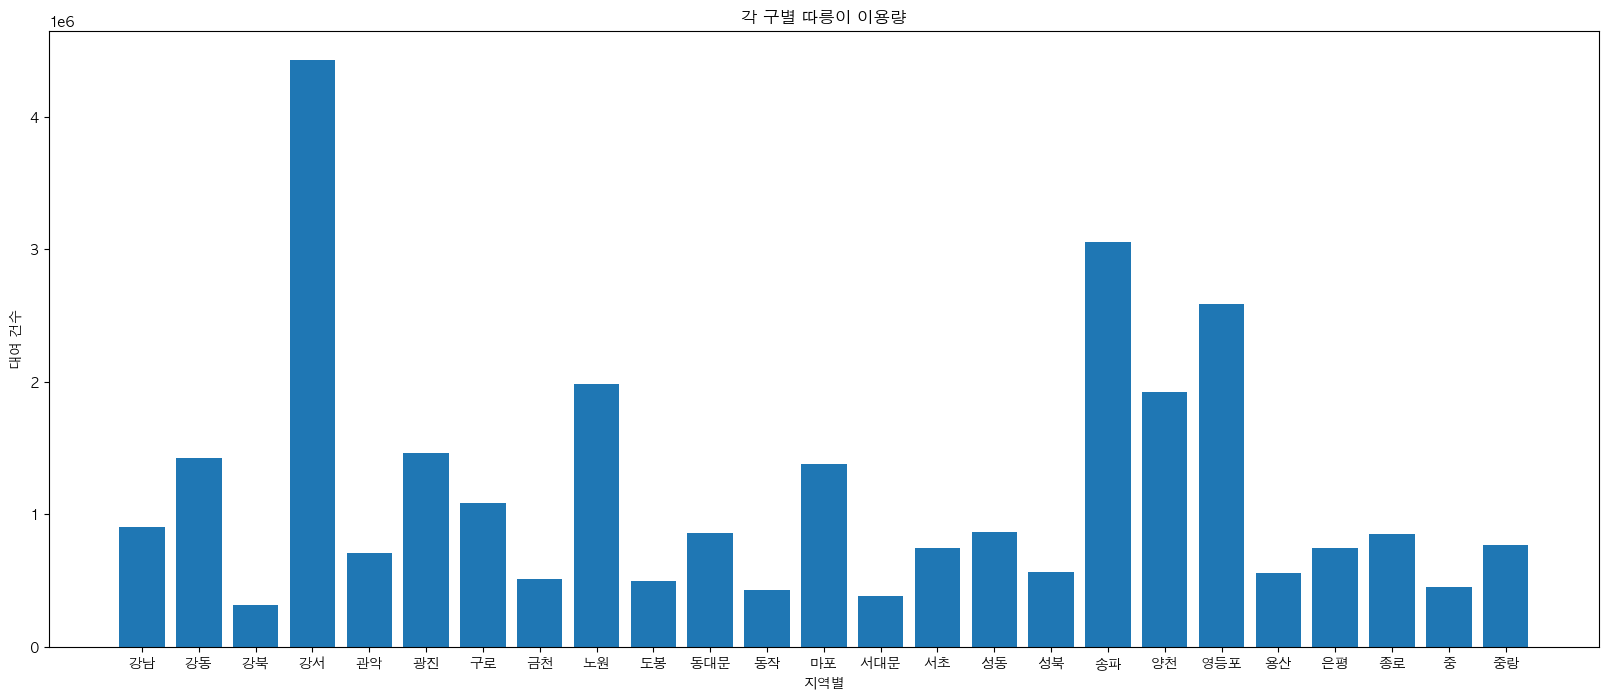

In [20]:
import matplotlib as mpl
import matplotlib.font_manager as fm
# font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
# font = fm.FontProperties(fname=font_path).get_name()
# mpl.rc('font', family=font)

# 맥 OS 폰트 깨짐 방지 코드aa
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(출발_구별_이동_수['시작_대여소_구'], 출발_구별_이동_수['이동_수'])

plt.title('각 구별 따릉이 이용량')
plt.xlabel('지역별')
plt.ylabel('대여 건수')

plt.show()

In [79]:
import plotly.express as px

fig = px.bar(출발_구별_이동_수, x='시작_대여소_구', y='이동_수', 
             title='각 구별 따릉이 이용량', 
             labels={'시작_대여소_구': '지역별', '이동_수': '대여 건수'})
fig.update_layout(xaxis_title='지역별', yaxis_title='대여 건수', height = 800)

fig.show()


## 강서구 따릉이 이용량 EDA

### 서울시 따릉이대여소 마스터 정보.csv >> 대여소 ID, 구 단위 저장

In [21]:
import numpy as np
import pandas as pd

# 따릉이 마스터 정보 불러오기
data= pd.read_csv('../../Data/따릉이/서울시 따릉이대여소 마스터 정보.csv',encoding='cp949')
# print(data)

# 구 단위 저장
대여소_data = data[['대여소_ID', '주소1']]
대여소_data['주소1'] = data['주소1'].str.extract(r'(\S+)구')


# 강서구 따릉이 대여소 ID 변수 생성

강서_대여소_ID = 대여소_data.loc[대여소_data['주소1'] == '강서', '대여소_ID']
강서_대여소_ID_df = pd.DataFrame({'대여소_ID': 강서_대여소_ID})

# csv 파일 저장
# 강서_대여소_ID_df.to_csv('강서_따릉이_대여소_ID.csv', index=False)

print(강서_대여소_ID)

26       ST-975
179      ST-837
180      ST-836
181      ST-835
182      ST-834
         ...   
3212    ST-1066
3213    ST-1065
3214    ST-1064
3215    ST-1063
3216    ST-1062
Name: 대여소_ID, Length: 224, dtype: object


/var/folders/_j/yl1g13yd0_s25zcx_fwnjdkm0000gn/T/ipykernel_6168/84801254.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  대여소_data['주소1'] = data['주소1'].str.extract(r'(\S+)구')


### 서울시 전체 >> 강서구

In [27]:
import pandas as pd
강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')
강서_대여소_ID = 강서_대여소_ID['대여소_ID']

따릉이_data = 데이터_01[['기준_날짜', '기준_시간대', '시작_대여소_ID', '종료_대여소_ID', '전체_건수','전체_이용_분','전체_이용_거리']]

강서출발_mask = 따릉이_data['시작_대여소_ID'].isin(강서_대여소_ID)

강서도착_mask = 따릉이_data['종료_대여소_ID'].isin(강서_대여소_ID)

강서_데이터 = 따릉이_data[강서출발_mask & 강서도착_mask]


# 강서_따릉이_data.to_csv('강서_따릉이_data_2023.csv',index=False)

### 강서구 따릉이 이용량 데이터 생성
* 2023.04~2024.03
* 날짜를 기준으로 랜덤하게 2등분

In [28]:
# 강서 데이터 일별로 묶기
강서_데이터_일별 = 강서_데이터.groupby('기준_날짜')

# 일별로 묶은 데이터를 리스트로 변환
일별_데이터_리스트 = [데이터 for 날짜, 데이터 in 강서_데이터_일별]

# 데이터를 섞기
np.random.seed(42)
np.random.shuffle(일별_데이터_리스트)

# 두 개의 덩어리로 나누기
덩어리_크기 = len(일별_데이터_리스트) // 2
강서_데이터_01 = pd.concat(일별_데이터_리스트[:덩어리_크기])
강서_데이터_02 = pd.concat(일별_데이터_리스트[덩어리_크기:])

# 각 그룹을 CSV 파일로 저장
# 강서_데이터_01.to_csv('강서_따릉이_데이터_01.csv', index=False)
# 강서_데이터_02.to_csv('강서_따릉이_데이터_02.csv', index=False)

### 24년 신설한 대여소 ID 확인

In [29]:
# 23년 강서구 따릉이 이용량

강서_2023 = pd.read_csv('../../../../data_semi/강서_따릉이_data_2023.csv',encoding='utf-8')
# 강서_2023.sort_values(by='기준_날짜')
# 강서_2023.dropna().sort_values(by='기준_날짜')

print('23.01 ~ 23.12')
print(강서_2023['시작_대여소_ID'].nunique())
print()

print('23.04 ~ 24.03')
print(강서_데이터['시작_대여소_ID'].nunique())
print()

23.01 ~ 23.12
194

23.04 ~ 24.03
195



In [30]:
강서_대여소_added_2024 = 강서_데이터[~강서_데이터['시작_대여소_ID'].isin(강서_2023['시작_대여소_ID'])]
print('24년에 신설된 대여소 ID')
print(강서_대여소_added_2024['시작_대여소_ID'].unique())
print()
print('대여소 신설 정보')
print(강서_대여소_added_2024.head())
print()
print('신설한 대여소를 이용한 데이터 개수:')
print(len(강서_대여소_added_2024))

24년에 신설된 대여소 ID
['ST-3284']

대여소 신설 정보
             기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수  전체_이용_분  전체_이용_거리
78574822  20240323    1235   ST-3284   ST-2884      1       12      1730
78585765  20240323    1320   ST-3284   ST-2477      1       20      2614
78596125  20240323    1400   ST-3284    ST-824      2       72      7364
78616656  20240323    1515   ST-3284   ST-1254      1       22      3297
78647901  20240323    1655   ST-3284   ST-2965      1       17      1377

신설한 대여소를 이용한 데이터 개수:
74


강서구 >> 강서구 평일

In [116]:
강서_데이터 = pd.concat([강서_데이터_01, 강서_데이터_02], ignore_index=True)
강서_데이터['기준_날짜'] = pd.to_datetime(강서_데이터['기준_날짜'], format='%Y/%m/%d')
강서_데이터 = 강서_데이터[강서_데이터['기준_날짜'].dt.dayofweek < 5]

In [121]:
강서_데이터

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리
0,20231110,0,ST-3260,ST-2024,1,11,2060
1,20231110,0,ST-3094,ST-1510,1,1,395
2,20231110,0,ST-1515,ST-508,1,2,441
3,20231110,0,ST-2611,ST-510,1,3,614
4,20231110,0,ST-514,ST-824,2,14,1060
...,...,...,...,...,...,...,...
4426561,20230712,745,ST-2022,ST-1254,6,29,5241
4426562,20230712,850,ST-2044,ST-3128,6,11,1320
4426563,20230712,1605,ST-2033,ST-2045,6,26,4660
4426564,20230712,1705,ST-1712,ST-2045,6,20,3769


# 강서_주중_데이터, 강서_휴일(주말)_데이터 구분

In [122]:
import pandas as pd

# 휴일 데이터
휴일 = [
    {"날짜": "2023-05-05"},
    {"날짜": "2023-05-29"},
    {"날짜": "2023-06-06"},
    {"날짜": "2023-08-15"},
    {"날짜": "2023-09-28"},
    {"날짜": "2023-09-29"},
    {"날짜": "2023-10-02"},
    {"날짜": "2023-10-03"},
    {"날짜": "2023-10-09"},
    {"날짜": "2023-12-25"},
    {"날짜": "2024-01-01"},
    {"날짜": "2024-02-09"},
    {"날짜": "2024-02-12"},
    {"날짜": "2024-03-01"},
]

# 주말과 휴일을 분류하는 함수 정의
def classify_weekend_and_holidays(df, holidays):
    # 기준_날짜 열을 datetime 형식으로 변환하고, 이를 기반으로 요일을 추출
    df['기준_날짜'] = pd.to_datetime(df['기준_날짜'], format='%Y%m%d')
    df['요일'] = df['기준_날짜'].dt.dayofweek  # 0: 월요일, 1: 화요일, ..., 6: 일요일
    
    # 주말(토요일: 5, 일요일: 6)인지 여부를 나타내는 열 추가
    df['주말'] = df['요일'].apply(lambda x: 1 if x >= 5 else 0)  # 토요일(5) 또는 일요일(6)이면 주말로 분류
    
    # 휴일인지 여부를 나타내는 열 추가
    df['휴일'] = df['기준_날짜'].apply(lambda x: 1 if str(x.date()) in [h['날짜'] for h in holidays] else 0)
    
    # 주말과 휴일으로 데이터 분리
    주말_df = df[(df['주말'] == 1) | (df['휴일'] == 1)]
    주중_df = df[(df['주말'] == 0) & (df['휴일'] == 0)]
    
    return 주말_df, 주중_df

# 주말과 휴일으로 데이터 분리
주말_따릉이_data, 주중_따릉이_data = classify_weekend_and_holidays(강서_데이터, 휴일)


- 강서_따릉이_데이터.csv

In [ ]:
# 일별로 데이터 묶기
일별_데이터_리스트 = [데이터 for 날짜, 데이터 in 주중_따릉이_data]

# 데이터를 섞기
np.random.seed(42)
np.random.shuffle(일별_데이터_리스트)

# 두 개의 덩어리로 나누기
덩어리_크기 = len(일별_데이터_리스트) // 2
강서_데이터_01 = pd.concat(일별_데이터_리스트[:덩어리_크기])
강서_데이터_02 = pd.concat(일별_데이터_리스트[덩어리_크기:])

# 각 그룹을 CSV 파일로 저장
강서_데이터_01.to_csv('강서_따릉이_데이터_011.csv', index=False)
강서_데이터_02.to_csv('강서_따릉이_데이터_022.csv', index=False)

- 강서_따릉이_데이터_주말_휴일.csv

In [ ]:
주말_따릉이_data.to_csv('강서_따릉이_데이터_주말_휴일.csv', index=False)

# 쏠림현상 데이터

In [5]:
# 출근시간, 퇴근시간 데이터 가져오기
출근시간_이용량 = pd.read_csv('../kimseongwon/결과물/출근시간_대여소_이용량2.csv',encoding='utf-8')
출근시간_이용량.drop('Unnamed: 0', axis=1, inplace=True)
출근시간_이용량.rename(columns = {'강서_데이터_시작':'출근대여량','강서_데이터_종료':'출근반납량'},inplace=True)

퇴근시간_이용량 = pd.read_csv('../kimseongwon/결과물/퇴근시간_대여소_이용량2.csv',encoding='utf-8')
퇴근시간_이용량.drop('Unnamed: 0', axis=1, inplace=True)
퇴근시간_이용량.rename(columns = {'강서_데이터_시작':'퇴근대여량','강서_데이터_종료':'퇴근반납량'},inplace=True)

# 새로운 컬럼 생성(차이, 차이 절대값 총이용량 등등)
출근시간_이용량['대여-반납량_출근'] = 출근시간_이용량['출근대여량'] - 출근시간_이용량['출근반납량']
출근시간_이용량['차이절대값_출근'] = 출근시간_이용량['대여-반납량_출근'].abs()
출근시간_이용량['총이용량_출근'] = 출근시간_이용량['출근대여량'] + 출근시간_이용량['출근반납량']

퇴근시간_이용량['대여-반납량_퇴근'] = 퇴근시간_이용량['퇴근대여량'] - 퇴근시간_이용량['퇴근반납량']
퇴근시간_이용량['차이절대값_퇴근'] = 퇴근시간_이용량['대여-반납량_퇴근'].abs()
퇴근시간_이용량['총이용량_퇴근'] = 퇴근시간_이용량['퇴근대여량'] + 퇴근시간_이용량['퇴근반납량']

# 출근시간_이용량 & 퇴근시간_이용량 합치기
출퇴근_이용량_통합 = pd.merge(출근시간_이용량,퇴근시간_이용량, how='outer',on='대여소_ID')

# 결측치 처리 >> ST-3284 출근시간대 이용량 없음 >> 0으로 처리(fillna(0))
출퇴근_이용량_통합 = 출퇴근_이용량_통합.fillna(0)

# 출퇴근_이용량_통합.to_csv('../kimseongwon/결과물/출퇴근_이용량_통합.csv')

### 기상 데이터
* 기온
* 강수량
* 대기질